In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Data

The data is easily acessible without having to parse the files manually from keras deep learning library.

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Show an image from the training dataset.

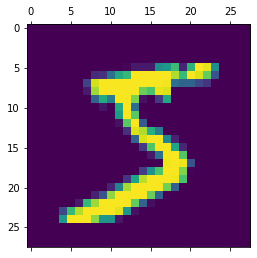

In [4]:
plt.matshow(X_train[0])

Get the shape of the data

In [5]:
X_train.shape

(60000, 28, 28)

Reshape the data into 60k rows by 784 columns.

In [6]:
X_train = np.reshape(X_train, (60000,28*28))

In [7]:
X_train.shape

(60000, 784)

In [8]:
def vectorize(num):
    vec=np.zeros(10)
    vec[num]=1
     
    return vec

In [9]:
y_train = (pd.Series(y_train).apply(vectorize)).to_numpy()

In [20]:
y_train = np.stack(y_train)

Now each row of A (X_train) can have a mapping to B (y_train) through x.

# 1

First trying a least squares solution (minimizing the 2-norm):

In [21]:
x = np.linalg.lstsq(X_train, y_train, rcond=None)

In [79]:
X_train.shape

(60000, 784)

I can plot the image along with the true label and the label found by least squares solution.
on the bottom left is the true label, on the bottom right is the model response label.

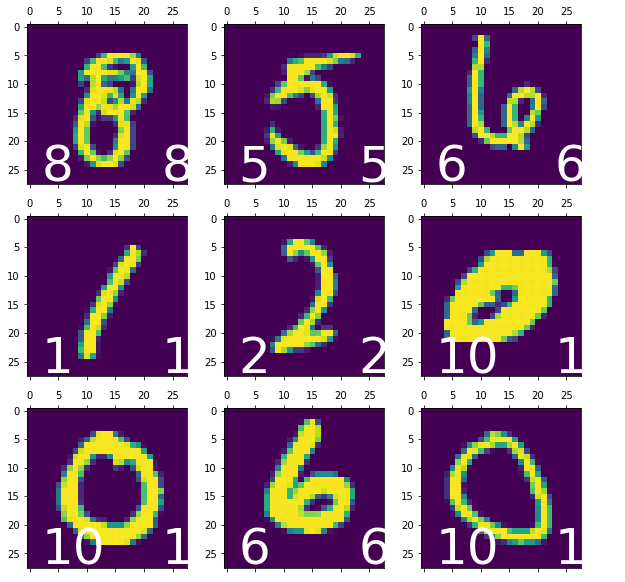

In [118]:
plt.figure(figsize=[10,10])
for i in np.arange(1,10):
    plt.subplot(3,3,i)
    check = np.random.randint(0,X_train.shape[0])
    plt.matshow(X_train[check].reshape(28,28), fignum=False)
    plt.text(23,27,(X_train@x[0])[check].argmax()+1, fontsize=50, c='white')
    plt.text(2,27,y_train[check].argmax()+1, fontsize=50, c='white')

Lets see how accurate the least square solve is:

In [135]:
y_pred = (X_train@x[0]).argmax(axis=1)+1

In [136]:
y_true = y_train.argmax(axis=1)+1

In [142]:
len([x for x in y_true-y_pred if x == 0]) / len(y_true)

0.8519333333333333

85% accuracy is pretty good!